In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://charlottesville.craigslist.org/search/msa?purveyor=owner#search=1~gallery~0~0' 
raw = requests.get(url,headers=header) # Get page


keywords = ['fender', 'epiphone', 'gibson', 'takamine', 'martin', 'taylor', 'esp', 'yamaha','gretsch', 'strat', 'tele', 'ibanez']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [10]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in keywords] # Find brands in the title
    if len(hits) == 0:
        keyword = 'missing'
    else:
        keyword = hits[0]
    data.append({'title':title,'price':price,'link':link,'keyword':keyword})


In [15]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('craigslist_cville_inst.csv')
df.head()

(144, 4)


,title,price,link,keyword
0,leather jacket - xl - rock on!!!,40,https://charlottesville.craigslist.org/msg/d/s...,missing
1,epiphone casino guitar - 2001,900,https://charlottesville.craigslist.org/msg/d/s...,epiphone
2,epiphone 160e john lennon acoustic/electric gu...,600,https://charlottesville.craigslist.org/msg/d/s...,epiphone
3,1940s hammond solovox 3 octave keyboard and to...,115,https://charlottesville.craigslist.org/msg/d/c...,missing
4,ukulele case,30,https://charlottesville.craigslist.org/msg/d/p...,missing


count     144.000000
mean      596.784722
std      1000.714208
min         0.000000
25%        47.500000
50%       187.500000
75%       700.000000
max      6500.000000
Name: price, dtype: float64


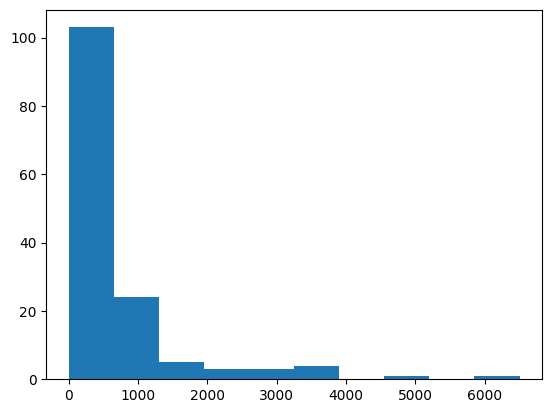

In [19]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [22]:
# Price by brand:
df.loc[:,['price','keyword']].groupby('keyword').describe()

price                                                            \
          count         mean          std     min     25%     50%     75%   
keyword                                                                     
epiphone    9.0   763.777778   363.768050   150.0   550.0   899.0  1050.0   
esp         2.0   425.000000   530.330086    50.0   237.5   425.0   612.5   
fender     11.0   341.000000   357.821184     1.0   137.5   200.0   500.0   
gibson      1.0  2499.000000          NaN  2499.0  2499.0  2499.0  2499.0   
gretsch     2.0   495.000000    77.781746   440.0   467.5   495.0   522.5   
ibanez      1.0   299.000000          NaN   299.0   299.0   299.0   299.0   
martin      2.0  2650.000000   212.132034  2500.0  2575.0  2650.0  2725.0   
missing   111.0   579.810811  1072.158727     0.0    40.0   125.0   665.0   
yamaha      5.0   203.000000   149.315103    15.0   150.0   150.0   300.0   

                  
             max  
keyword           
epiphone  1200.0  
esp        800.0  
fender    1200.0  
gibson    2499.0  
gretsch    550.0  
ibanez     299.0  
martin    2800.0  
missing   6500.0  
yamaha     400.0

In [23]:
df.loc[ df['keyword']=='fender',:]

,title,price,link,keyword
31,5 string fender banjo/hardcase,1200,https://charlottesville.craigslist.org/msg/d/t...,fender
60,1997 fender mexican strat,350,https://charlottesville.craigslist.org/msg/d/q...,fender
86,fender deluxe molded bass case,175,https://charlottesville.craigslist.org/msg/d/c...,fender
89,fender fm 25r amp spring reverb,160,https://charlottesville.craigslist.org/msg/d/g...,fender
99,fender pickups,1,https://charlottesville.craigslist.org/msg/d/p...,fender
102,fender hot rod deluxe - made in usa w/ upgrade...,200,https://charlottesville.craigslist.org/msg/d/c...,fender
110,fender rocpro 1000 guitar head,200,https://charlottesville.craigslist.org/msg/d/q...,fender
121,fender mustang ii 40w guitar amplifier,115,https://charlottesville.craigslist.org/msg/d/w...,fender
128,fender limited edition telecaster,650,https://charlottesville.craigslist.org/msg/d/l...,fender
130,fender limited edition telecaster,650,https://charlottesville.craigslist.org/msg/d/l...,fender


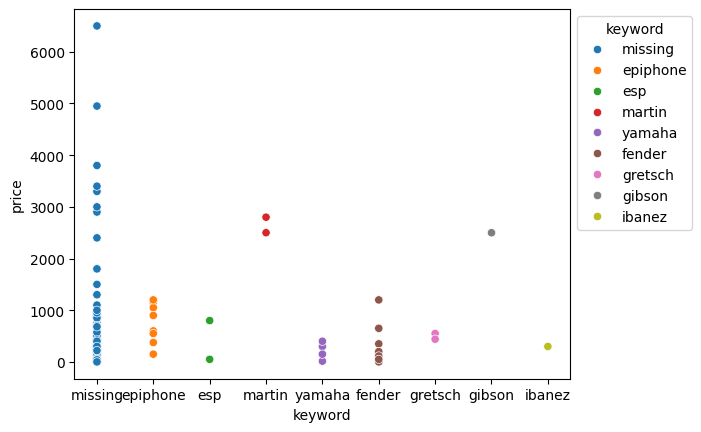

In [26]:
ax = sns.scatterplot(data=df, x='keyword', y='price',hue='keyword')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))